In [4]:
import requests
from datetime import datetime
import time
import pandas as pd
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [11]:
## Code to download and import the file (DO run this code)
sr = pd.read_csv('https://github.com/jdfoote/Intro-to-Programming-and-Data-Science/blob/master/resources/data/sr_post_data.csv?raw=true')

In [12]:
# Change the date to a datetime, and put it in the index
sr.index = pd.to_datetime(sr.date)

### EXERCISE 1

Modify the code above to plot how often "Coronavirus" is used in each of the three subreddits over time

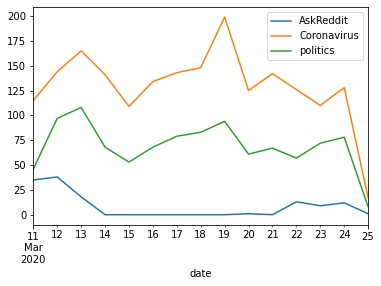

In [15]:
#### YOUR CODE HERE
subreddits = ['AskReddit','Coronavirus', 'politics']

#sr['num_posts'] = 1 # As in earlier visualization, just tells us each row represents 1 post

curr_df = sr.loc[sr.title.str.contains("Coronavirus") | sr.selftext.str.contains("Coronavirus")]
for sub in subreddits:
    subposts = curr_df[curr_df.subreddit == sub]
    posts_per_day = subposts.resample('D').size()
    posts_per_day.plot(label = sub)

plt.legend()
plt.show()

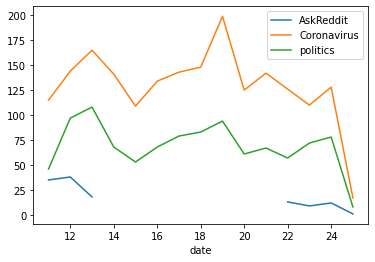

In [19]:
sr['num_posts'] = 1 # As in earlier visualization, just tells us each row represents 1 post

curr_df = sr.loc[sr.title.str.contains("Coronavirus") | sr.selftext.str.contains("Coronavirus")]
posts_per_day = curr_df.groupby([curr_df.index.day, curr_df.subreddit]).num_posts.sum().unstack().plot()

plt.legend()
plt.show()

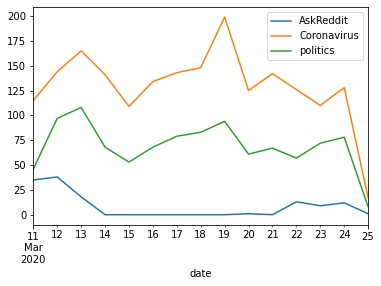

In [24]:
sr['num_posts'] = 1
subred = []
for sub_name, sub_df in sr.groupby("subreddit"):
    subreddit_df = sub_df.loc[sub_df.title.str.contains("Coronavirus") | sub_df.selftext.str.contains("Coronavirus")]
    subreddit_df = subreddit_df.resample('D').num_posts.sum()
    subreddit_df.plot(label = sub_name)

plt.legend()
plt.show()

In [21]:
subred[0]

('AskReddit',
                                                                  title  \
 date                                                                     
 2020-03-25 03:58:28             What’s your least favorite color? Why?   
 2020-03-25 03:57:58   What was the reason for the last time you cried?   
 2020-03-25 03:57:17  What are songs that have to be played full bla...   
 2020-03-25 03:55:50  How to get rid of excessive amounts of anger a...   
 2020-03-25 03:51:49                         What's your go to fantasy?   
 ...                                                                ...   
 2020-03-11 04:02:05           Why are people overreacting to COVID-19?   
 2020-03-11 04:01:38  What's the most random thing you can think of ...   
 2020-03-11 04:01:15                      What’s the best state in USA?   
 2020-03-11 04:00:37  Red wine flowed out of the taps in Italy, whic...   
 2020-03-11 04:00:24  without saying the name of it, describe your f...   
 
         

In [36]:
sr.loc[(pd.isna(sr.selftext)) | (sr.selftext.isin(['[removed]', '[deleted]'])), 'selftext'] = ''
sr['all_text'] = sr.title + ' ' + sr.selftext

male_words = ['he', 'his']
female_words = ['she', 'hers']

# This puts all of the text of each subreddit into lists
def string_to_list(x):
    return ' '.join(x).split()
grouped_text = sr.groupby('subreddit').all_text.apply(string_to_list)

# Then, we count how often each type of words appears in each subreddit
agg = grouped_text.aggregate({'proportion-male': lambda x: sum([x.count(y) for y in male_words])/len(x),
                        'proportion-female': lambda x: sum([x.count(y) for y in female_words])/len(x)}
                        )

In [37]:
agg

                   subreddit  
proportion-male    AskReddit      0.000858
                   Coronavirus    0.001704
                   politics       0.005122
proportion-female  AskReddit      0.000199
                   Coronavirus    0.000253
                   politics       0.000126
Name: all_text, dtype: float64

### EXERCISE 2

One of the trickiest parts of analysis is getting the data in the form that you want it in order to analyze/visualize it. 

I think a good visualization for this would be a barplot showing how often male and female word types appear for each subreddit. I'll give you the final call to produce the plot:

`sns.barplot(x='subreddit', y='proportion', hue = 'word_gender', data = agg_df_long)`

Now, see if you can get the data in shape so that this code actually works! :)

*Hint: You'll want to use [wide to long](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html)*

In [17]:
## Example of how wide_to_long works (from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.wide_to_long.html)

import numpy as np
np.random.seed(0)

df = pd.DataFrame({'A(weekly)-2010': np.random.rand(3),
                   'A(weekly)-2011': np.random.rand(3),
                   'B(weekly)-2010': np.random.rand(3),
                   'B(weekly)-2011': np.random.rand(3),
                   'X' : np.random.randint(3, size=3)})
df['id'] = df.index
df 

,A(weekly)-2010,A(weekly)-2011,B(weekly)-2010,B(weekly)-2011,X,id
0,0.548814,0.544883,0.437587,0.383442,0,0
1,0.715189,0.423655,0.891773,0.791725,1,1
2,0.602763,0.645894,0.963663,0.528895,1,2


In [18]:
pd.wide_to_long(df, # The data
                # The prefixes for the data columns. These will become column names that hold data values.
                stubnames = ['A(weekly)', 'B(weekly)'], 
                # i is a column which uniquely identifies each row
                i='id',
                # j is what you want to call the prefix
                j='year',
                # sep is a string that it between the stubnames and the values which will go in j
                sep='-')

,,X,A(weekly),B(weekly)
id,year,,,
0,2010,0,0.548814,0.437587
1,2010,1,0.715189,0.891773
2,2010,1,0.602763,0.963663
0,2011,0,0.544883,0.383442
1,2011,1,0.423655,0.791725
2,2011,1,0.645894,0.528895


In [47]:
agg_df = agg.unstack(level=0)
agg_df = agg_df.reset_index()

### Your code here


agg_long = pd.wide_to_long(agg_df,
                stubnames='proportion', 
                i= "subreddit",
                # j is what you want to call the prefix
                j='word_gender',
                suffix ='\w+',
                sep='-'
                )
agg_df_long = pd.DataFrame(agg_long).reset_index() #becuase the internet said .reset solved the problem of not recocnizing column names, but Jeremy already had it above...
agg_df_long

,subreddit,word_gender,proportion
0,AskReddit,male,0.000858
1,Coronavirus,male,0.001704
2,politics,male,0.005122
3,AskReddit,female,0.000199
4,Coronavirus,female,0.000253
5,politics,female,0.000126


In [35]:
agg_list

[('proportionMale', 'AskReddit', 0.0008577826318965474),
 ('proportionMale', 'Coronavirus', 0.0017037934044890027),
 ('proportionMale', 'politics', 0.0051219142047753945),
 ('proportionFemale', 'AskReddit', 0.00019948433299919708),
 ('proportionFemale', 'Coronavirus', 0.00025345687008927314),
 ('proportionFemale', 'politics', 0.0001264670174018616)]

<AxesSubplot:xlabel='subreddit', ylabel='proportion'>

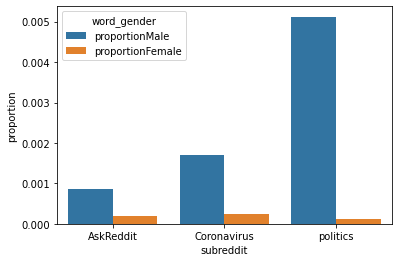

In [34]:
agg_list = []
for i in range(len(agg)):
    agg_list.append((agg.index[i][0], agg.index[i][1], agg.values[i]))

from pandas import DataFrame
agg_df = DataFrame(agg_list, columns = ["word_gender", "subreddit", "proportion"])
agg_df

sns.barplot(x='subreddit', y='proportion', hue = 'word_gender', data = agg_df)

<AxesSubplot:xlabel='subreddit', ylabel='proportion'>

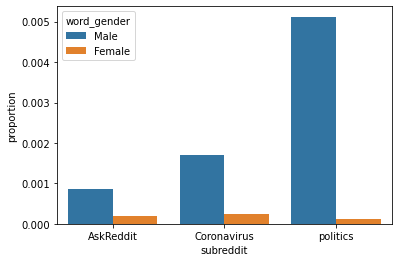

In [33]:
## Once you've created agg_df_long with the columns proportion and word_gender, you should be able to run this
sns.barplot(x='subreddit', y='proportion', hue = 'word_gender', data = agg_df_long)

### EXERCISE 3

Make your own analysis, with a different set of terms

<AxesSubplot:xlabel='subreddit', ylabel='proportion'>

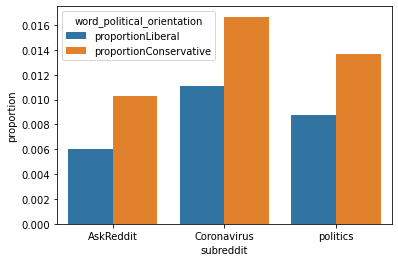

In [48]:
mft = open('mfd.txt', 'r', encoding="utf-8")
mft_word = []
for line in mft:
    mft_word.append(line)
mft.close()
mft_word = mft_word[11:]
liberal_words = []
conservative_words = []
for i in range(len(mft_word)):
    if mft_word[i][mft_word[i].find("\n")-1] == "1" or "2" in mft_word[i] or "3" in mft_word[i] or "4" in mft_word[i]:
        liberal_words.append(mft_word[i][0:mft_word[i].find("\t")])
    else:
        conservative_words.append(mft_word[i][0:mft_word[i].find("\t")])
def string_to_list(x):
    return ' '.join(x).split()
grouped_text = sr.groupby('subreddit').all_text.apply(string_to_list)

agg = grouped_text.aggregate({'proportionLiberal': lambda x: sum([x.count(y) for y in liberal_words])/len(x),
                        'proportionConservative': lambda x: sum([x.count(y) for y in conservative_words])/len(x)}
                        )

agg_list = []
for i in range(len(agg)):
    agg_list.append((agg.index[i][0], agg.index[i][1], agg.values[i]))

from pandas import DataFrame
agg_df = DataFrame (agg_list, columns = ["word_political_orientation", "subreddit", "proportion"])

sns.barplot(x='subreddit', y='proportion', hue = 'word_political_orientation', data = agg_df)

In [51]:
from time import time
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.decomposition import NMF, LatentDirichletAllocation
import sys
import csv
import pandas as pd
import argparse

"""
This code was inspired/copied from http://scikit-learn.org/stable/auto_examples/applications/topics_extraction_with_nmf_lda.html.

It takes in a list of documents and creates two outputs:
1. The documents together with their topic distribution and 
2. A set of topics and the top words associated with each.
"""


def run_lda(dataset, 
            n_topics = 10,     # How many topics to produce
            n_features = 20000 # How many different n-grams to consider (uses the most common)
           ):


    print("Loading dataset...")
    t0 = time()
    print("done in %0.3fs." % (time() - t0))

    # Use tf (raw term count) features for LDA.
    print("Extracting tf features for LDA...")
    tf_vectorizer = CountVectorizer(max_df=0.95, # Terms that show up in > max_df of documents are ignored
                                    #min_df=2, # Terms that show up in < min_df of documents are ignored
                                    max_features=n_features, # Only use the top max_features 
                                    stop_words='english',
                                    ngram_range=(1,2))
    t0 = time()
    tf = tf_vectorizer.fit_transform(dataset)
    print("done in %0.3fs." % (time() - t0))


    print("Fitting LDA models with tf features, "
          "n_samples=%d and n_features=%d..."
          % (len(dataset), n_features))
    lda = LatentDirichletAllocation(n_components=n_topics, max_iter=5,
                                    learning_method='online',
                                    learning_offset=50.,
                                    random_state=2017,
                                    n_jobs=2)
    t0 = time()
    model = lda.fit(tf)
    transformed_model = lda.fit_transform(tf)
    print("done in %0.3fs." % (time() - t0))


    # Change the values into a probability distribution for each document
    topic_dist = [[topic/sum(topics) 
                   for topic in topics]
                          for topics in transformed_model]

    # Make the topic distribution into a dataframe
    td = pd.DataFrame(topic_dist)
    # Get the feature names (i.e., the words/terms)
    tf_feature_names = tf_vectorizer.get_feature_names()


    # Get the top words by topic
    topic_words = get_top_words(lda, tf_feature_names, 20)
    # Sort by how often topic is used
    topic_words = topic_words.reindex(sorted(topic_words.columns, 
                                             key = lambda x: td[x].sum(), 
                                             reverse=True),axis=1)

    # Rearrange the columns by how often each topic is used
    td = td.reindex(sorted(td.columns, 
                           key = lambda x: td[x].sum(), 
                           reverse=True),
                    axis=1)
    
    print('Topics by how common each topic is:')
    print(topic_words)
    print('Distributions of topic for each subreddit')
    print(td)
    


def get_top_words(model, feature_names, n_top_words):
    '''Takes the model, the words used, and the number of words requested.
    Returns a dataframe of the top n_top_words for each topic'''
    r = pd.DataFrame()
    # For each topic
    for i, topic in enumerate(model.components_):
        # Get the top feature names, and put them in that column
        r[i] = [add_quotes(feature_names[i])
                    for i in topic.argsort()[:-n_top_words - 1:-1]]
    return r

def add_quotes(s):
    '''Adds quotes around multiple term phrases'''
    if " " in s:
        s =  '"{}"'.format(s)
    return s

### EXERCISE 4

Where topic modeling really shines is in analyzing longer texts - for example, the subreddit [changemyview](https://www.reddit.com/r/changemyview/) has fairly long posts where people explain a controversial view that they hold.

Try to figure out how to get a few hundred posts from changemyview, and run a topic model on them, where the selftext of each post is a document.

In [49]:
## Code used to create the dataset - no need to run this code

endpt = 'https://api.pushshift.io/reddit/search/submission'

subreddits = ['changemyview']

# Start and end date (pushshift expects these in epoch time)
start_date = int(datetime.strptime('2020-03-11', '%Y-%m-%d').timestamp())
end_date = int(datetime.strptime('2020-03-25', '%Y-%m-%d').timestamp())


def get_posts(subreddit, before = end_date, after = start_date, result = None,  min_comments = 20):
    params = {'subreddit': subreddit,
              'num_comments': f'>{min_comments}',
              'before': before,
              'size': 500
             }
    if result == None:
        result = []
    r = requests.get(endpt, params=params)
    print(r.url)
    print(datetime.fromtimestamp(before))
    for item in r.json()['data']:
        created_time = item['created_utc']
        if created_time < after: # If we've reached the earliest we want, then return
            print(len(result))
            return result
        else:
            try:
                result.append((item['title'],item['selftext'], created_time, subreddit))
            except KeyError:
                print(item)
    time.sleep(.5)
    return get_posts(subreddit, before = created_time, result = result)


sr_data = []
for subreddit in subreddits:
    new_data = get_posts(subreddit)
    sr_data = sr_data + new_data
sr = pd.DataFrame(sr_data, columns = ['title', 'selftext', 'date', 'subreddit'])
sr.date = pd.to_datetime(sr.date, unit='s')
sr.to_csv('./change_my_view.csv', index = False)

https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1585108800&size=500
2020-03-25 00:00:00
https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1584813062&size=500
2020-03-21 13:51:02
https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1584507012&size=500
2020-03-18 00:50:12
https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1584262715&size=500
2020-03-15 04:58:35
https://api.pushshift.io/reddit/search/submission?subreddit=changemyview&num_comments=%3E20&before=1583974710&size=500
2020-03-11 20:58:30
457


In [53]:
dataset = sr.selftext
run_lda(dataset)

Loading dataset...
done in 0.000s.
Extracting tf features for LDA...
done in 0.412s.
Fitting LDA models with tf features, n_samples=457 and n_features=20000...
done in 6.003s.
Topics by how common each topic is:
          1          3                      5                  7  \
0    people       time                removed           officers   
1      like  marijuana                   like        enforcement   
2       don     people                  karma  "police officers"   
3      just       just                 people  "law enforcement"   
4     think        amp                    don             people   
5      want     states                   just             police   
6      time       jews                   subs               acab   
7      make       does        "posts removed"              think   
8       way      exist  "removed immediately"           bastards   
9   believe      think          "account age"               like   
10     life      water     "original con